In [1]:
#Assumption of linear regression 
'''1. There should be linearrelation ship between input and output variables
   2. if relation is linear so this should be homoskedastic relation(means 
   datapoints are close each other) not heteroskeastic relation 
   (means datapoints are scatterd)
   3. There should be no multicolineraity (means not correlated with 2 input
     each other)
    4. Relation should be normal distributed curve means well shaped curve
    means mean=median=mode means no skewness '''

'1. There should be linearrelation ship between input and output variables\n   2. if relation is linear so this should be homoskedastic relation(means \n   datapoints are close each other) not heteroskeastic relation \n   (means datapoints are scatterd)\n   3. There should be no multicolineraity (means not correlated with 2 input\n     each other)\n    4. Relation should be normal distributed curve means well shaped curve\n    means mean=median=mode means no skewness '

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#to show first 5 records
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
#in ths dataset , we want to predict sales means this is contineous numeric value
#means solve by linear regression
#we have multiple input so we use multiple linear regression means many input
#and one output

In [9]:
#basic steps means visualise the scatterplot between input and output , to check
#relation between input and output

#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable

In [10]:
X.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper'], dtype='object')

Unnamed: 0


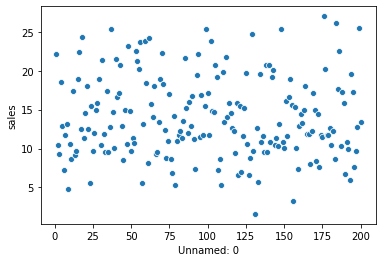

TV


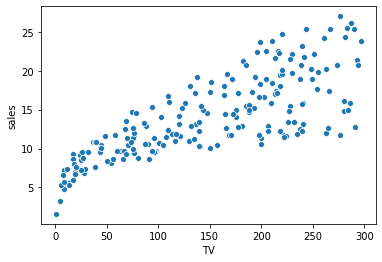

radio


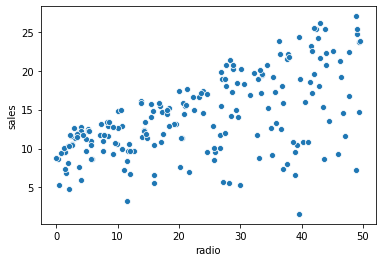

newspaper


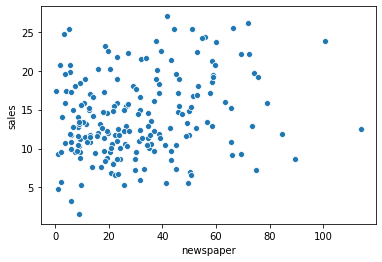

In [11]:
#scatterplot 
for col in X:
    print(col)
    sns.scatterplot(df[col],Y)  #scatterplot(X,Y)
    plt.show()

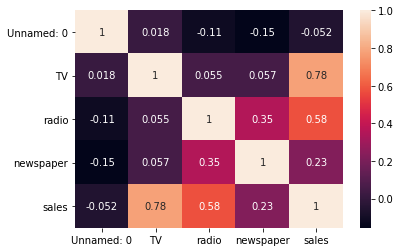

In [12]:
#check correlation value and visualize in heatmap()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable

In [14]:
X.head()

,Unnamed: 0,TV,radio,newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4


In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [17]:
#we train the model with the help of multiple linear regression 
#equation of MLR :  Y_pred=m1*X1+m2*X2+m3*X3+b
#X1=TV X2=radio and X3=newspaper
#means Y_pred=m1*TV+m2*radio+m3*newspaper+b

#call class LinearRegression 
from sklearn.linear_model import LinearRegression

In [18]:
#create the object of LinearRegression
lr=LinearRegression()

In [19]:
#test the data
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
#check coefficient slope
lr.coef_

array([-1.27037730e-04,  4.69528853e-02,  1.76558505e-01,  1.79170856e-03])

In [21]:
#check intercept
lr.intercept_

2.9522424683797492

In [22]:
Y_pred=lr.predict(X_test)

In [23]:
Y_pred

array([21.66726472, 16.44886585,  7.70162782, 17.91693951, 18.6598302 ,
       23.77686855, 16.28148316, 13.45215658,  9.16134283, 17.31440772,
       14.42914135,  9.85120603, 17.27607345, 16.62782623, 15.08911406,
       15.49601481, 12.42628103, 17.33599227, 11.03927674, 18.06273193,
        9.36111799, 12.7997845 ,  8.74017775, 10.47426246, 11.39043595,
       15.01903559,  9.7479584 , 19.45620185, 18.18124577, 17.21163034,
       21.57046641, 14.69384162, 16.25255007, 12.36123532, 19.96129204,
       15.36852746, 13.99610286, 10.08100899, 20.9223882 ,  7.42982649,
        3.66996929,  7.27759842,  5.98440814, 18.4246142 ,  8.3232281 ,
       14.11983162, 14.93410073, 20.36600912, 20.551861  , 19.54783442,
       24.10207685, 14.84753143,  6.71277509, 19.78115551, 18.95031714,
       12.50189261, 14.19083579,  6.10782886, 15.35859061,  9.56315359])

In [24]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
mean_squared_error(Y_test,Y_pred)

1.927467520698772

In [27]:
mse=mean_squared_error(Y_test,Y_pred)
print("Mean squared error : ",mse)
#root mean squared error RMSE
rmse=np.sqrt(mse)
print("root mean squared error RMSE : ",rmse)

Mean squared error :  1.927467520698772
root mean squared error RMSE :  1.3883326405075882


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(Y_test,Y_pred)
#r2_score>0.5 then good but best >.90 but we try >.95

0.9225191550357025

# 1 assumption of linear regression(remove multicolinearity )

In [30]:
#Assumption check of linear regression in this model  :
#1. There should be no multicolinearity

#radio and newspaper both input are correlated each other so delete any 
#one input so how to decide whose input are deleted ,
#we check corelation between radio and o/p sales which is 0.57 
#and check corr between newspaper and o/p sales which is 0.23 
#means corr between radio and o/p sales > corr between newspaper and o/p sales 
#means select radio and delete newspaper

X=df[["TV","radio"]] #2D input features (input always 2 D)
Y=df["sales"] #output means target 
#means we solve 1 assumption of linear regression(remove multicolinearity )

In [31]:
##Divide the dataset into 70% and 30% for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [32]:
#Create object of LinearRegression class
lr=LinearRegression()

In [33]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lr.coef_

array([0.04697554, 0.17765046])

In [35]:
lr.intercept_

2.9647671191401574

In [36]:
y_pred=lr.predict(X_test)

In [37]:
Y_pred

array([21.66726472, 16.44886585,  7.70162782, 17.91693951, 18.6598302 ,
       23.77686855, 16.28148316, 13.45215658,  9.16134283, 17.31440772,
       14.42914135,  9.85120603, 17.27607345, 16.62782623, 15.08911406,
       15.49601481, 12.42628103, 17.33599227, 11.03927674, 18.06273193,
        9.36111799, 12.7997845 ,  8.74017775, 10.47426246, 11.39043595,
       15.01903559,  9.7479584 , 19.45620185, 18.18124577, 17.21163034,
       21.57046641, 14.69384162, 16.25255007, 12.36123532, 19.96129204,
       15.36852746, 13.99610286, 10.08100899, 20.9223882 ,  7.42982649,
        3.66996929,  7.27759842,  5.98440814, 18.4246142 ,  8.3232281 ,
       14.11983162, 14.93410073, 20.36600912, 20.551861  , 19.54783442,
       24.10207685, 14.84753143,  6.71277509, 19.78115551, 18.95031714,
       12.50189261, 14.19083579,  6.10782886, 15.35859061,  9.56315359])

In [38]:
Y_test

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
198    25.5
95     16.9
4      12.9
29     10.5
168    17.1
171    14.5
18     11.3
11     17.4
89     16.7
110    13.4
118    15.9
159    12.9
35     12.8
136     9.5
59     18.4
51     10.7
16     12.5
44      8.5
94     11.5
31     11.9
162    14.9
38     10.1
28     18.9
193    19.6
27     15.9
47     23.2
165    11.9
194    17.3
177    11.7
176    20.2
97     15.5
174    11.5
73     11.0
69     22.3
172     7.6
108     5.3
107     8.7
189     6.7
14     19.0
56      5.5
19     14.6
114    14.6
39     21.5
185    22.6
124    19.7
98     25.4
123    15.2
119     6.6
53     21.2
33     17.4
179    12.6
181    12.2
106     7.2
199    13.4
138     9.6
Name: sales, dtype: float64

In [39]:
mean_squared_error(Y_test,Y_pred)

1.927467520698772

In [40]:
r2_score(Y_test,Y_pred)

0.9225191550357025

# 2. There should be linear relationship between input and output  

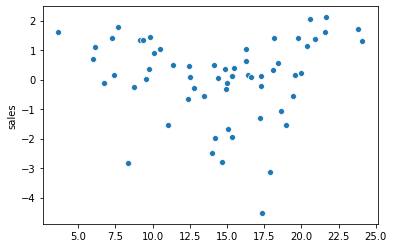

In [41]:
#very good score but more better

#Assumption check of linear regression in this model  :
#1.
#2. There should be linear relationship between input and output 

#here input : TV and radio  and output sales
#How to chekc relation relationship : with the help of sctterplot(X,Y)
#we have trick means hack , we find residual after than draw scatterplot 
#between residuals and Y_pred and check either linear relation or not
residuals=Y_test-Y_pred
sns.scatterplot(Y_pred,residuals)
plt.show()

In [42]:
#To see this scatterplot , we got curve not a no linear relation means no 
#linear relation between input(TV and radio) and output(sales) means 
#this assumption is fail

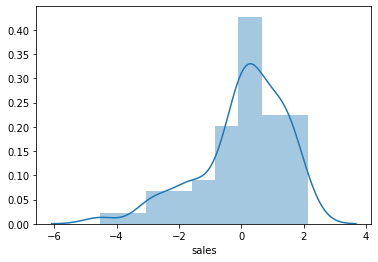

In [43]:
#assumption 4 . there should be normal distribution curve means well shaped
#curve means no skewness 
#we visualise frequency graph w.t.h of distplot
sns.distplot(residuals)
plt.show()

In [44]:
#see this graph , not got Normal distribution curve

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
#Demo of polynomial regression 
#we create the input variable X with help of arange() of numpy
X=np.arange(-100,100) #start=-100  stop=100-1=99 and step=+1
print(X)

[-100  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87
  -86  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73
  -72  -71  -70  -69  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59
  -58  -57  -56  -55  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45
  -44  -43  -42  -41  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31
  -30  -29  -28  -27  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17
  -16  -15  -14  -13  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3
   -2   -1    0    1    2    3    4    5    6    7    8    9   10   11
   12   13   14   15   16   17   18   19   20   21   22   23   24   25
   26   27   28   29   30   31   32   33   34   35   36   37   38   39
   40   41   42   43   44   45   46   47   48   49   50   51   52   53
   54   55   56   57   58   59   60   61   62   63   64   65   66   67
   68   69   70   71   72   73   74   75   76   77   78   79   80   81
   82   83   84   85   86   87   88   89   90   91   92   93   94   95
   96 

In [ ]:
#see this graph , not got Normal distribution curve
#we work on remaining 3 assumption   of linear regression
#means increase the degree of X means use polynomial linear regression(PLR)


In [ ]:
#we work on remaining 3 assumption   of linear regression
#means increase the degree of X means use polynomial linear regression(PLR)


In [47]:
#We perform the Polynomials Regression  , call inbuilt class PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [48]:
#Create the object of PolynomialFeatures class and pass the degree of X(input
#features)
pf=PolynomialFeatures(2) #here 2 is a degree of X  means
#increase the degree of X


In [ ]:
#Eq : ax^2+b^x+c=0  means Y=m1*X^2+m2*X+b


In [49]:
X=df[["TV","radio"]] #input feature , always input 2D
Y=df["sales"] #target means ouput


In [50]:
#equation :  X1=TV  and X2=radio
#equation m1X1^2+m2*X1^1 : TV   and m3X2^2+m4*X2^1 : radio
#Y_pred=m1X1^2+m2*X1^1+m3X2^2+m4*X2^1+b

X_poly=pf.fit_transform(X)
#fit_transform() inbuilt function of PolynomialFeatures


In [51]:
#Apply same steps means train_test_split() : 70% and 30%
#Divide the dataset into 70% and 30% for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [52]:
lr=LinearRegression()

In [53]:
#train the model with 70% data use fit() method
lr.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#Test the model use inbuilt method predict() of LinearRegression class
Y_pred=lr.predict(X_test)


In [55]:
mean_squared_error(Y_test,Y_pred)


0.17238345081004028

In [56]:
r2_score(Y_test,Y_pred)


0.9930704848288281

In [ ]:
# excellent score 99%
#But check assumption of Linear regression : -

#2. There should be linear relationship between input and output 
#here input : TV and radio  and output sales
#How to check relation relationship : with the help of sctterplot(X,Y)
#we have trick means hack , we find residual after than draw scatterplot 


In [ ]:
#between residuals and Y_pred and check either linear relation or not
residuals=Y_test-Y_pred
sns.scatterplot(Y_pred,residuals)
plt.show()
#fullfill first assumption means linear relationship between input and output 
#here -ve corelation 


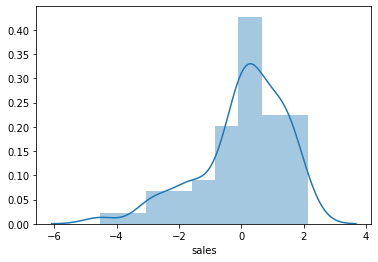

In [57]:
#but here heteroskedastic  but should be homoskedastic 
#check 4th assumption : there should be normal distributed curve 
#we visualise frequency graph w.t.h of distplot
sns.distplot(residuals)
plt.show()
